In [1]:
import math
math.tanh(-2.2)

-0.9757431300314515

In [4]:
import torch.nn as nn
import torch
linear_model = nn.Linear(1,1)

In [6]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108],
        [-1.7108]], grad_fn=<AddmmBackward0>)

In [7]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 81.9, 56.3, 48.0, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_u.shape


torch.Size([10, 1])

In [9]:
optimizer = torch.optim.SGD(linear_model.parameters(), lr = 1e-2)

In [19]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.6118]], requires_grad=True),
 Parameter containing:
 tensor([0.9994], requires_grad=True)]

In [12]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
def dloss_fn(t_p, t_c):
    dsq = 2* (t_p - t_c)
    return dsq / t_p.size(0)
def model_dw(t_u, w, b):
    return t_u
def model_db(t_u, w, b):
    return 1.0
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dp =  dloss_fn(t_p, t_c)
    dloss_dw = model_dw(t_u,w,b) * dloss_dp
    dloss_db = model_db(t_u,w,b) * dloss_dp
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [80]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 81.9, 56.3, 48.0, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_sample = t_u.shape[0]
n_val = int(0.2 * n_sample)
shuffled_index = torch.randperm(n_sample)
train_index = shuffled_index[:-n_val]
val_index = shuffled_index[-n_val:]
train_index, val_index

train_tu = t_u[train_index]
train_tc = t_c[train_index]

val_tu = t_u[val_index]
val_tc = t_c[val_index]

train_tun = 0.1 * train_tu
val_tun = 0.1 * val_tu

linear_model = nn.Linear(1,1)

train_index, train_tu

(tensor([0, 6, 5, 1, 3, 9, 2, 4]),
 tensor([[35.7000],
         [21.8000],
         [33.9000],
         [55.9000],
         [56.3000],
         [68.4000],
         [81.9000],
         [48.0000]]))

In [15]:
def training(n_epochs, optimizer, model, train_tu, train_tc, val_tu, val_tc):
    for epoch in range(1,n_epochs+1):
        train_tp = model(train_tu)
        train_loss = loss_fn(train_tp, train_tc)
        with torch.no_grad():
            val_tp = model(val_tu)
            val_loss = loss_fn(val_tp, val_tc)
            assert val_loss.requires_grad == False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epchs {epoch}, Training Loss {train_loss.item():.4f}'f" Validation loss {val_loss.item():.4f}")
    return params

In [99]:
def model(t_u, w , b):
    return t_u*w+b
def training(n_epochs, optimizer, model, loss_fn, train_tu, train_tc, val_tu, val_tc):
    for epoch in range(1,n_epochs+1):
        train_tp = model(train_tu)
        train_loss = loss_fn(train_tp, train_tc)
        val_tp = model(val_tu)
        val_loss = loss_fn(val_tp, val_tc)
            
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epchs {epoch}, Training Loss {train_loss.item():.4f}'f" Validation loss {val_loss.item():.4f}")


In [82]:
linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-2)
training(n_epochs = 3000, optimizer = optimizer, model = linear_model, loss_fn=nn.MSELoss(), train_tu = train_tun, train_tc = train_tc, val_tu = val_tun, val_tc=val_tc)
print(linear_model.weight)
print(linear_model.bias)

Epchs 1, Training Loss 213.8275 Validation loss 28.0300
Epchs 1000, Training Loss 38.8009 Validation loss 147.9176
Epchs 2000, Training Loss 38.7986 Validation loss 147.7060
Epchs 3000, Training Loss 38.7986 Validation loss 147.6845
Parameter containing:
tensor([[2.6442]], requires_grad=True)
Parameter containing:
tensor([-1.7209], requires_grad=True)


In [66]:
seq_model = nn.Sequential(nn.Linear(1,13),
                         nn.Tanh(),
                         nn.Linear(13,1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [48]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [49]:
list(param.shape for param in seq_model.parameters())

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [74]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([13, 1])
hidden_linear.bias torch.Size([13])
out_put_linear.weight torch.Size([1, 13])
out_put_linear.bias torch.Size([1])


In [70]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,13)),
    ('hidden_activation', nn.Tanh()),
    ('out_put_linear', nn.Linear(13,1))
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (out_put_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [75]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([13, 1])
hidden_linear.bias torch.Size([13])
out_put_linear.weight torch.Size([1, 13])
out_put_linear.bias torch.Size([1])


In [81]:
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-4)
training(n_epochs = 5000, optimizer = optimizer, model = seq_model, loss_fn=nn.MSELoss(), train_tu = train_tun, train_tc = train_tc, val_tu = val_tun, val_tc=val_tc)
print('output', seq_model(val_tun))
print('answer', seq_model(val_tc))
print('hidden', seq_model.hidden_linear.weight.grad)

Epchs 1, Training Loss 198.1665 Validation loss 26.3757
Epchs 1000, Training Loss 198.1665 Validation loss 26.3757
Epchs 2000, Training Loss 198.1665 Validation loss 26.3757
Epchs 3000, Training Loss 198.1665 Validation loss 26.3757
Epchs 4000, Training Loss 198.1665 Validation loss 26.3757
Epchs 5000, Training Loss 198.1665 Validation loss 26.3757
output tensor([[-0.0693],
        [-0.1075]], grad_fn=<AddmmBackward0>)
answer tensor([[-0.6787],
        [-0.1065]], grad_fn=<AddmmBackward0>)
hidden tensor([[ 3.3443e+03],
        [ 1.5591e+03],
        [-2.3810e+04],
        [ 1.7747e+04],
        [-1.3854e+03],
        [-2.0028e+03],
        [-4.0009e+04],
        [-1.6183e+02],
        [-5.2367e+03],
        [-1.6814e+05],
        [ 2.4391e+03],
        [ 2.8595e+02],
        [ 9.3637e+04]])


In [89]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [86]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [87]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 1,  4,  5,  0,  2,  8,  9,  6, 10]), tensor([7, 3]))

In [88]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [105]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_tu, val_tu,
                  train_tc, val_tc):
    for epoch in range(1, n_epochs + 1):
        train_tp = model(train_tu) # <1>
        train_loss = loss_fn(train_tp, train_tc)

        val_tp = model(val_tu) # <1>
        val_loss = loss_fn(val_tp, val_tc)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")


In [91]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))


In [107]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    train_tu = t_un_train,
    val_tu = t_un_val, 
    train_tc = t_c_train,
    val_tc = t_c_val)

training(n_epochs = 5000,
         optimizer = optimizer,
         model = seq_model,
         loss_fn=nn.MSELoss(),
         train_tu = t_un_train,
         train_tc = t_c_train,
         val_tu = t_un_val,
         val_tc=t_c_val)
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 50.4572, Validation loss 204.8736
Epoch 1000, Training loss 2.0523, Validation loss 12.3750
Epoch 2000, Training loss 2.0278, Validation loss 9.5445
Epoch 3000, Training loss 2.0221, Validation loss 8.9086
Epoch 4000, Training loss 2.0188, Validation loss 8.7333
Epoch 5000, Training loss 2.0158, Validation loss 8.6987
Epchs 1, Training Loss 2.0158 Validation loss 8.6987
Epchs 1000, Training Loss 2.0128 Validation loss 8.7161
Epchs 2000, Training Loss 2.0097 Validation loss 8.7541
Epchs 3000, Training Loss 2.0066 Validation loss 8.8029
Epchs 4000, Training Loss 2.0035 Validation loss 8.8545
Epchs 5000, Training Loss 2.0003 Validation loss 8.9097
output tensor([[ 0.0649],
        [26.8616]], grad_fn=<AddmmBackward0>)
answer tensor([[-4.],
        [28.]])
hidden tensor([[ 4.6438e-03],
        [ 9.3985e-04],
        [-4.6741e-03],
        [ 2.6660e-03],
        [-8.6439e-03],
        [ 5.0853e-03],
        [-2.2411e-05],
        [ 3.7783e-03]])


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

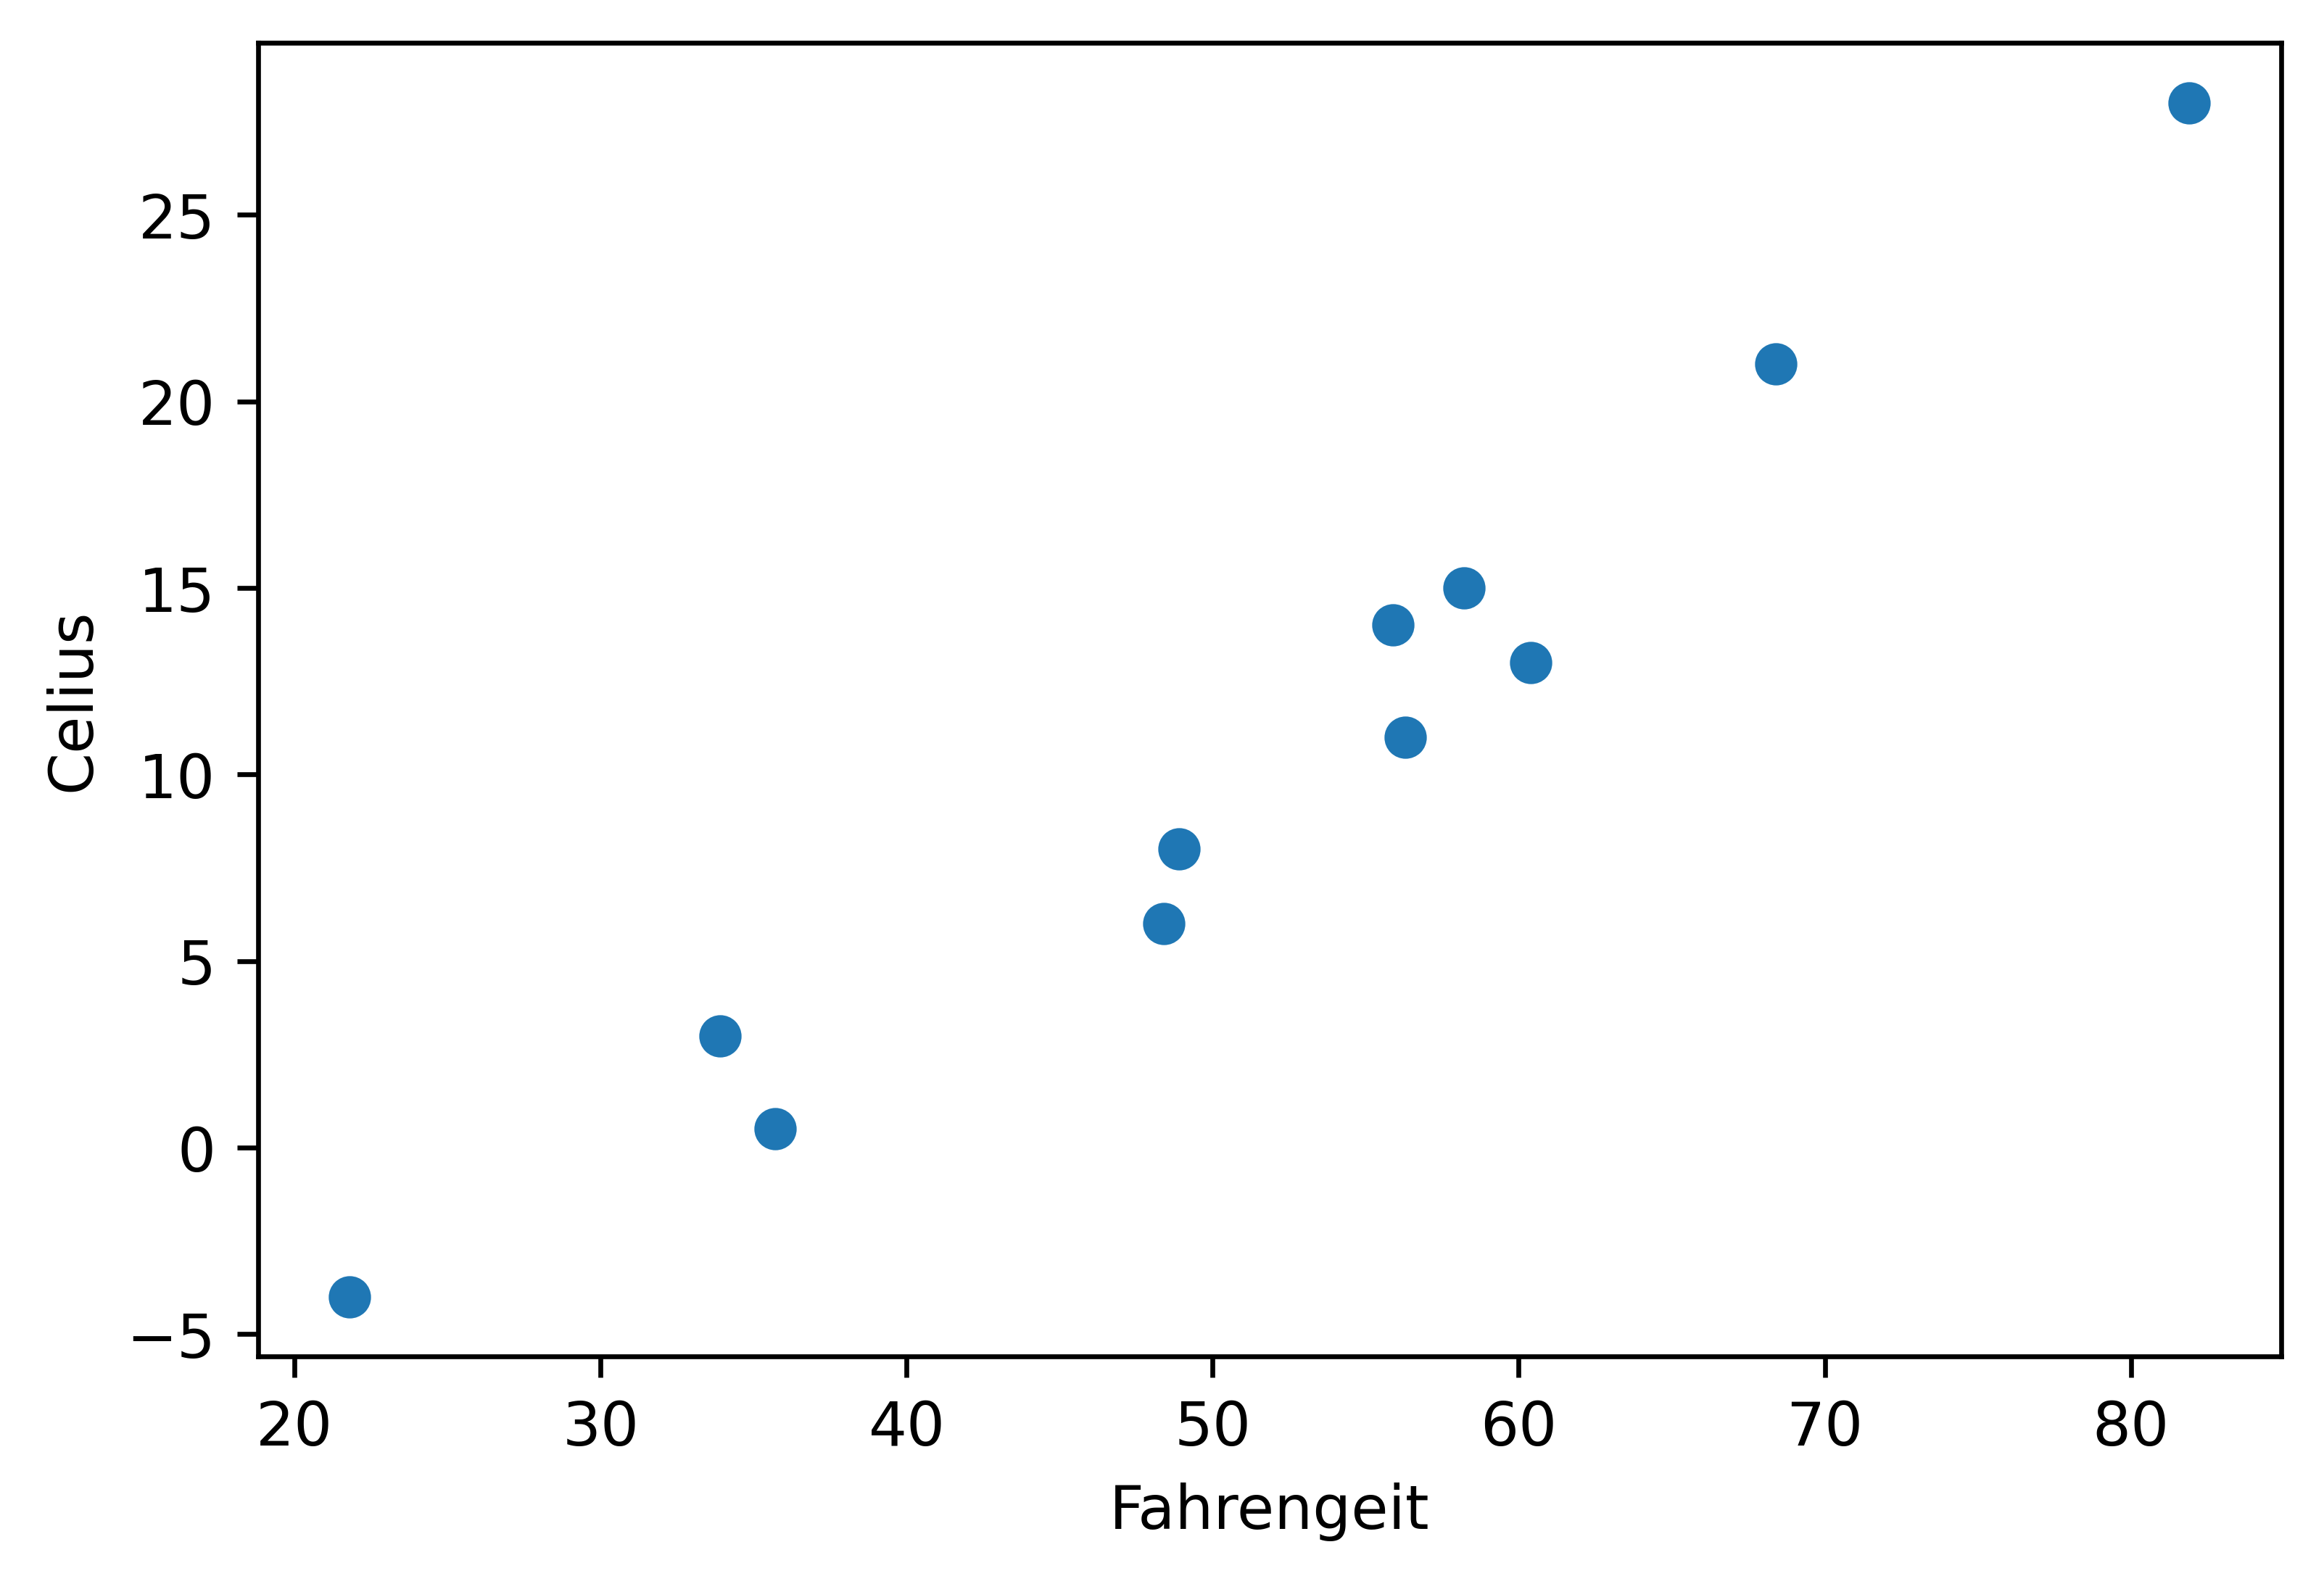

In [114]:
from matplotlib import pyplot as plt
t_range = torch.arange(20.,90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrengeit")
plt.ylabel("Celius")
plt.plot(t_u.numpy(), t_c.numpy(),'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx') #XX啦